# INSTALLING TOPICMODELS PACKAGE
In addition to common scientific libraries, the tutorial also requires installation of the topicmodels package located at https://github.com/alan-turing-institute/topic-modelling-tools. If you already have Python and pip installed (for example by installing Anaconda per the instructions above), pip install topic-modelling-tools should work.

In [13]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd()
os.chdir("C:\\Python\\Lib\\site-packages")
import topicmodels

In [19]:
os.getcwd()
os.chdir("C:\\Users\\39338")
data = pd.read_csv("mpc_minutes.txt", encoding="utf-8", sep="\t")

# Pre-processing the text

In [20]:
data.shape

(7277, 2)

In [21]:
docsobj = topicmodels.RawDocs(data.minutes, "long") # creates object for pre-processing

In [22]:
docsobj.token_clean(1) # Remove all non-alphabetic tokens and all tokens of length one.
docsobj.tokens[1][1:30]  # first thirty tokens of second meeting

['month',
 'growth',
 'rate',
 'of',
 'notes',
 'and',
 'coins',
 'had',
 'fallen',
 'back',
 'since',
 'january',
 'when',
 'it',
 'was',
 'it',
 'had',
 'fallen',
 'to',
 'in',
 'april',
 'and',
 'the',
 'provisional',
 'estimate',
 'for',
 'may',
 'was',
 'it']

In [23]:
all_tokens = [s for d in docsobj.tokens for s in d]
print("number of unique tokens = %d" % len(set(all_tokens)))
print("number of total tokens = %d" % len(all_tokens))

number of unique tokens = 8967
number of total tokens = 1115996


In [25]:
docsobj.stopwords # the stopwords removed in this example

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'another',
 'any',
 'are',
 'as',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'even',
 'ever',
 'every',
 'few',
 'first',
 'five',
 'for',
 'four',
 'from',
 'further',
 'get',
 'go',
 'goes',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'high',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'least',
 'less',
 'like',
 'long',
 'made',
 'make',
 'many',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'never',
 'new',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'old',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'put',
 'said',
 'same',
 'say',
 'says',
 'second',
 'see',
 

In [26]:
docsobj.stopword_remove("tokens") # the stopwords removed in this example

In [27]:
all_tokens = [s for d in docsobj.tokens for s in d]
print("number of unique tokens = %d" % len(set(all_tokens)))
print("number of total tokens = %d" % len(all_tokens))

number of unique tokens = 8818
number of total tokens = 613560


Look at the effect on the number of total tokens from removing a relatively small number of unique tokens.

The final pre-processing step in this example is stemming, which removes suffixes from words in order to map tokens with different grammatical forms into a single linguistic root.

In [28]:
docsobj.stem()

In [29]:
all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 5550
number of total stems = 613560


In [30]:
docsobj.stopword_remove("stems") # Keep only unique stems

all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 5521
number of total stems = 610222


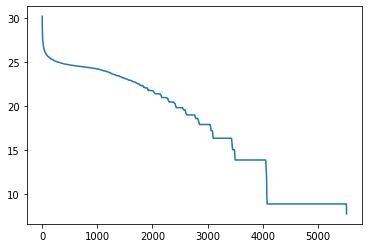

In [34]:
docsobj.term_rank("stems")

#We have already dropped standard stopwords, but there may also be data-dependent common words
plt.plot([x[1] for x in docsobj.tfidf_ranking])
#plt.plot([x[1] for x in docsobj.df_ranking])

In [35]:
docsobj.rank_remove("tfidf","stems",docsobj.tfidf_ranking[3300][1]) # remove low rank stems

In [36]:
all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 3099
number of total stems = 406863


# Estimate Topic Model by LDA algorithm

In [37]:
ldaobj = topicmodels.LDA.LDAGibbs(docsobj.stems,30) #Specify the number of topics in the text
print(ldaobj.K) # number of topic, user defined.
print(ldaobj.alpha) # hyperparameter for document-topic distribution, automatically defined
print(ldaobj.beta) # hyperparameter for topics, automatically defined

30
1.6666666666666667
0.06453694740238787


In [38]:
ldaobj.sample(2000, 50, 20) # Run Gibbs sampler

Iteration 10 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 30 of (collapsed) Gibbs sampling
Iteration 40 of (collapsed) Gibbs sampling
Iteration 50 of (collapsed) Gibbs sampling
Iteration 60 of (collapsed) Gibbs sampling
Iteration 70 of (collapsed) Gibbs sampling
Iteration 80 of (collapsed) Gibbs sampling
Iteration 90 of (collapsed) Gibbs sampling
Iteration 100 of (collapsed) Gibbs sampling
Iteration 110 of (collapsed) Gibbs sampling
Iteration 120 of (collapsed) Gibbs sampling
Iteration 130 of (collapsed) Gibbs sampling
Iteration 140 of (collapsed) Gibbs sampling
Iteration 150 of (collapsed) Gibbs sampling
Iteration 160 of (collapsed) Gibbs sampling
Iteration 170 of (collapsed) Gibbs sampling
Iteration 180 of (collapsed) Gibbs sampling
Iteration 190 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampli

In [39]:
ldaobj.perplexity()
print(ldaobj.tt.shape)
print(ldaobj.dt.shape)
ldaobj.topic_content(25, output_file="topic_description.csv")

(3099, 30, 20)
(7277, 30, 20)


In [40]:
# Estimate time series of topics attention
# merge all paragraphs into one text
data['temp'] = [' '.join(s) for s in docsobj.stems]
aggspeeches = data.groupby(['year'])['temp'].apply(lambda x: ' '.join(x))
aggdocs = topicmodels.RawDocs(aggspeeches)

queryobj = topicmodels.LDA.QueryGibbs(aggdocs.tokens,
                                      ldaobj.token_key,
                                      ldaobj.tt)
queryobj.query(10)
queryobj.perplexity()

dt_query = queryobj.dt_avg()
aggdata = pd.DataFrame(dt_query, index=aggspeeches.index,
                       columns=['T' + str(i) for i in range(queryobj.K)])
# save data to csv file
aggdata.to_csv("final_output_agg.csv")

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried
Sample 10 queried
Sample 11 queried
Sample 12 queried
Sample 13 queried
Sample 14 queried
Sample 15 queried
Sample 16 queried
Sample 17 queried
Sample 18 queried
Sample 19 queried
